In [1]:
%matplotlib inline


# imports needed for the following examples
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import scipy.spatial.distance as distance

# read a local file (path is relative to python's working directory)
# sep, header=True/None
infile = '../data/PO_asof_20150525.txt'
df = pd.read_table(infile, sep="|", thousands=',')

# set column name
df.columns = ['comp_code', 'comp_name', 'vendor_code', 'vendor_name',
              'which_day', 'po', 'amt']

grouped_comp = df.groupby('comp_code').agg({'amt': np.sum,
                                            'po': 'count'})

grouped_comp.rename(columns={'po': 'po_cnt'}, inplace=True)
grouped_comp['po_cnt_log'] = np.log(grouped_comp['po_cnt'])
grouped_comp['amt_log'] = np.log(grouped_comp['amt'])

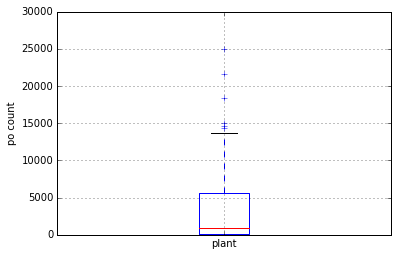

In [2]:
fig = plt.figure()
ax = grouped_comp['po_cnt'].plot('box')
# ax.set_xlabel("xx")
ax.set_ylabel('po count')
plt.xticks([1], ['plant'])

fig.savefig('test.png')

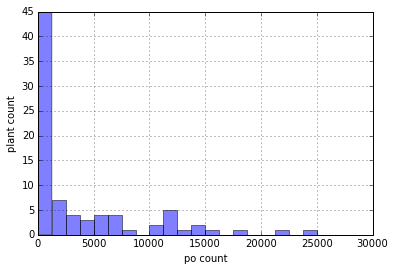

In [12]:
ax = grouped_comp['po_cnt'].plot('hist', alpha=0.5, bins=20)
ax.set_xlabel('po count')
ax.set_ylabel('plant count')

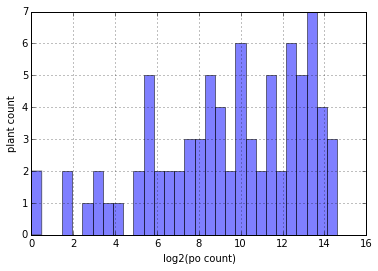

In [11]:
ax = grouped_comp['po_cnt_log'].plot('hist', alpha=0.5, bins=30)
ax.set_xlabel('log2(po count)')
ax.set_ylabel('plant count')

In [62]:
np.power(2, 9.363717)
np.log2(894.000000 )

9.8041310211833181

In [56]:
grouped_comp.describe()

,vendor_cnt,amt,vendor_cnt_log,amt_log
count,82.000000,8.200000e+01,82.000000,82.000000
mean,3859.414634,9.075405e+08,9.363717,26.454046
std,5588.489159,1.484848e+09,3.661000,4.333323
min,1.000000,1.030770e+04,0.000000,13.331435
25%,129.500000,1.674473e+07,7.014306,23.996830
50%,894.000000,1.336340e+08,9.803694,26.991069
75%,5552.250000,1.100607e+09,12.438853,30.017386
max,25029.000000,6.074226e+09,14.611313,32.500054


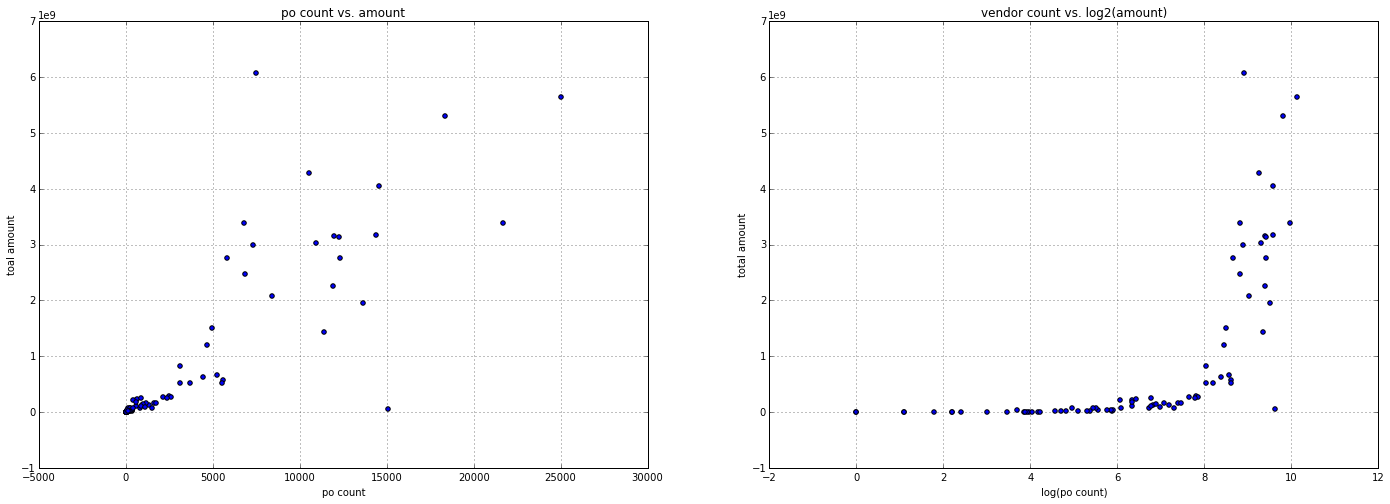

In [5]:
grouped_comp.sort(['po_cnt_log', 'amt_log'], ascending=[False, False])

fig2, ax2 = plt.subplots(nrows=1, ncols=2)
fig2.set_size_inches(24, 8)
plt.subplots_adjust(wspace=0.2)

# 5950|华能海南发电股份有限公司东方电厂
# 4732|华能吉林发电有限公司长春生物质热电厂
# 51A0|华能济南黄台发电有限公司

grouped_comp.plot(kind='scatter', x='po_cnt', y='amt', ax=ax2[0],
                  title='po count vs. amount')
ax2[0].set_xlabel('po count')
ax2[0].set_ylabel('toal amount')

grouped_comp.plot(kind='scatter', x='po_cnt_log', y='amt', ax=ax2[1],
                  title='vendor count vs. log2(amount)')
ax2[1].set_xlabel('log(po count)')
ax2[1].set_ylabel('total amount')